In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Generate 1000 real number for the variable X from the uniform distribution U
[0,1]. Construct the training set T = { (x1,y1),(x2,y2),......,(x1000,y1000)} using
the relation

Yi = sin(2 π xi) + εi where εi ~ N(0,0.25).

In the similar way construct a testing set of size 50

I,e. Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}.


In [53]:
# train data
def get_x_y(low,high,size , mean , sigma):
    x = np.random.uniform(low,high,size)
    e = np.random.normal(mean,sigma,size)
    y = np.sin(2*math.pi*x)+e
    return x , y

np.random.seed(3)
train_x , train_y = get_x_y(low = 0 , high = 1 , size = 1000 ,
                mean = 0 , sigma = 0.25)

train = np.array(tuple(zip(train_x,train_y)))

In [54]:
np.random.seed(15)
# test set
test_x,test_y = get_x_y(low = 0 , high = 1 , size = 50 ,
              mean = 0 , sigma = 0.25) 
test = np.array(tuple(zip(test_x,test_y)))

In [55]:
def RMSE(Y,est_Y):
    rmse = np.sqrt(sum((Y-est_Y)**2)/len(Y))
    return rmse

def MAE(Y,est_Y):
    mae = sum(abs(Y - est_Y))/len(Y)
    return mae

def R_2(Y,est_Y):
    mean_Y = np.mean(Y)
    mean_est_Y = np.mean(est_Y)
    r_2 = sum((Y-mean_Y)**2)/sum((est_Y-mean_est_Y)**2)
    return r_2

1. Find the best fit using Least Square gradient descent, considering
polynomial basis function of order 8. Find the best RMSE MAE and R^2 by
tuning the value regularization parameter λ. Also obtain the corresponding
plot of best fit.

In [56]:
def get_matrix_of_input_A(X,m):
    A = []
    for i in range(m,-1,-1):
        A.append(polynomial_basis_fun(X,i))
    A = np.array(A)
    return A.T

def polynomial_basis_fun(X,order):
    return np.array(X)**order

def get_predicted_Y(A,W):   
    return np.matmul(A,W)

def gradient_for_RLF(Y,A,W,Lembda):  # RLF means Regularized Loss Function
    W0 = W.copy()
    W0[-1] = 0
    grad = (Lembda*W0 - A.T @ (Y - A @ W))
    return grad

def get_Weights_W(alpha,A,Y,Lembda,no_iteration=100000): # alpha is learning rate
    W = np.zeros(A.shape[1])
    for i in range(no_iteration):
        W = W - alpha * gradient_for_RLF(Y,A,W,Lembda)
    return W

In [57]:
def get_Lembda_for_best_RMSE_MAE_R2(alpha,tune_set,A,Y): 
    best = 0
    RMSE_array = [0]*(len(tune_set))
    MAE_array = [0]*(len(tune_set))
    R_2_array = [0]*(len(tune_set))
    for i in range(len(tune_set)):
        Lembda = tune_set[i]
        W = get_Weights_W(alpha,A,Y,Lembda)
        Predicted_Y = get_predicted_Y(A,W)
        rmse = RMSE(Y,Predicted_Y)
        mae = MAE(Y,Predicted_Y)
        r_2 = R_2(Y,Predicted_Y)
        RMSE_array[i] = rmse
        MAE_array[i] = mae
        R_2_array[i] = r_2
        if (rmse < RMSE_array[best]) and (mae < MAE_array[best]) and (r_2 < R_2_array[best]) :
            best = i
    Lembda = tune_set[best]
    return Lembda

In [58]:
def plot_graph(train_X,train_Y,test_X,test_Y,predicted_Y):
    print("RMSE is",RMSE(test_Y,predicted_Y))
    print("MAE is",MAE(test_Y,predicted_Y))
    print("R^2 is",R_2(test_Y,predicted_Y))
    plt.scatter(train_X,train_Y, edgecolors='orange',color='white',s=10, alpha=0.2)
    x = np.linspace(0, 1, 10000)
    y = np.sin(2*math.pi*x)
    plt.plot(x, y,color='black', label = "Actual Curve")
    X_sorted_index = np.argsort(test_X)
    X_sorted = test_X[X_sorted_index]
    Y_sorted = predicted_Y[X_sorted_index]
    plt.plot(X_sorted,Y_sorted,color='purple', label = "Predicted Curve")
    plt.xlabel('Input X')
    plt.ylabel('Output Y')
    plt.legend(loc='best', fontsize='small',facecolor='pink')
    plt.grid()
    plt.show()

In [59]:
def Polynomial_Regression_by_GD(train_X,train_Y,test_X,test_Y,order,tune_set,alpha,no_iteration):   # GD means Gradient Descent
    train_A = get_matrix_of_input_A(train_X,order)
    test_A = get_matrix_of_input_A(test_X,order)
    Lembda = get_Lembda_for_best_RMSE_MAE_R2(alpha,tune_set,train_A,train_Y)
    print("Lembda is",Lembda)
    W = get_Weights_W(alpha,train_A,train_Y,Lembda,no_iteration)
    predicted_Y = get_predicted_Y(test_A,W)
    plot_graph(train_X,train_Y,test_X,test_Y,predicted_Y)

In [60]:
tune_set = [2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**6,2**7]

Lembda is 0.0078125
RMSE is 0.27747872669311197
MAE is 0.2158390885848151
R^2 is 1.261919242044441


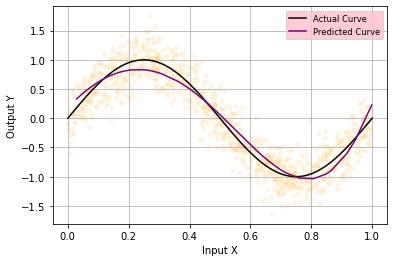

In [61]:
Polynomial_Regression_by_GD(train_x,train_y,test_x,test_y,8,tune_set,0.0001,100000)

2. Find the best fit using a direct method, considering Least Square RBF (Gaussian) Kernel . Find the best RMSE ,MAE and R^2 by tuning the value RBF (Gaussian Kernel) and regularization parameter . Also obtain the corresponding plot of best fit.

In [62]:
def Gaussian_kernal_fun(x,z,sigma):
    ans = math.exp(-(((math.sqrt(sum((np.array(x)-np.array(z))**2)))**2)/(2*(sigma**2))))
    return ans

def kernal_matrix_for_train_data(X,sigma):
    l = len(X)
    k = []
    for i in range(l):
        k.append([])
        for j in range(l+1):
            k[i].append(1)
    for i in range(l):
        for j in range(l):
            k[i][j] = Gaussian_kernal_fun([X[i]],[X[j]],sigma)
    return np.array(k)

def kernal_matrix(X1,X2,sigma):
    k = []
    for i in range(len(X1)):
        k.append([])
        for j in range(len(X2)+1):
            k[i].append(1)
    for i in range(len(X1)):
        for j in range(len(X2)):
            k[i][j] = Gaussian_kernal_fun([X1[i]],[X2[j]],sigma)
    return np.array(k)

def kernal_weights(k,Y,Lembda):
    I0 = np.identity(int(len(Y)+1))
    I0[-1][-1] = 0
    u = np.matmul((np.linalg.inv(np.add(Lembda*I0,np.matmul(k.T,k)))),(np.matmul(k.T,Y)))
    return u


def get_Sigma_and_Lembda_for_best_RMSE_MAE_R2(X,Y,set_of_sigma,set_of_Lembda):
    opti_rmse = 2**10
    opti_mae = 2**10
    opti_r_2 = 2**10
    opti_sigma = -1
    opti_Lembda = 2**10
    for lem in set_of_Lembda:
        for sigma in set_of_sigma:
            k = kernal_matrix_for_train_data(X,sigma)
            u = kernal_weights(k,Y,lem)
            predicted_y = get_predicted_Y(k,u)
            rmse = RMSE(Y,predicted_y)
            mae = MAE(Y,predicted_y)
            r_2 = R_2(Y,predicted_y)
            if (rmse < opti_rmse) and (mae < opti_mae) and (r_2 < opti_r_2):
                opti_rmse = rmse
                opti_mae = mae
                opti_r_2 = r_2
                opti_sigma = sigma
                opti_Lembda = lem
    return opti_sigma, opti_Lembda

In [63]:
def Kernal_Regression(train_X,train_Y,test_X,test_Y,set_of_sigma,set_of_Lembda):
    Sigma, Lembda = get_Sigma_and_Lembda_for_best_RMSE_MAE_R2(train_X,train_Y,set_of_sigma,set_of_Lembda)
    print("Sigma is",Sigma)
    print("Lembda is",Lembda)
    train_k = kernal_matrix(train_X,train_X,Sigma)
    test_k = kernal_matrix(test_X,train_X,Sigma)
    u = kernal_weights(train_k,train_Y,Lembda)
    predicted_Y = get_predicted_Y(test_k,u)
    plot_graph(train_X,train_Y,test_X,test_Y,predicted_Y)

In [64]:
set_of_sigma_01 = [0.25,0.75,1.25,1.75,2.25]
set_of_Lembda_01 = [2**-7,2**-4,2**-1,2**0,2**1,2**4,2**7]

Sigma is 0.25
Lembda is 0.0078125
RMSE is 0.2642241293948726
MAE is 0.20925297283154032
R^2 is 1.128750381991498


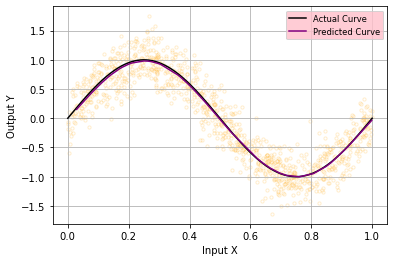

In [65]:
Kernal_Regression(train_x,train_y,test_x,test_y,set_of_sigma_01,set_of_Lembda_01)

3. Find the best fit using kernel gradient descent, considering RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian Kernel) and regularization parameter sigma. Also obtain the corresponding plot of best fit.

In [70]:
def get_Sigma_and_Lembda_for_best_RMSE_MAE_R2_GDM(X,Y,alpha,set_of_sigma,set_of_Lembda):  # GDM means Gradient Descent Method
    opti_rmse = 2**10
    opti_mae = 2**10
    opti_r_2 = 2**10
    opti_sigma = -1
    opti_Lembda = 2**10
    for lem in set_of_Lembda:
        for sigma in set_of_sigma:
            k = kernal_matrix(X,X,sigma)
            w = get_Weights_W(alpha,k,Y,lem,10000)
            predicted_y = get_predicted_Y(k,w)
            rmse = RMSE(Y,predicted_y)
            mae = MAE(Y,predicted_y)
            r_2 = R_2(Y,predicted_y)
        if (rmse < opti_rmse) and (mae < opti_mae) and (r_2 < opti_r_2):
            opti_rmse = rmse
            opti_mae = mae
            opti_r_2 = r_2
            opti_sigma = sigma
            opti_Lembda = lem
    return opti_sigma, opti_Lembda

In [71]:
def Kernal_Regression_by_GD(train_X,train_Y,test_X,test_Y,set_of_sigma,set_of_Lembda,alpha,no_iteration):     # GD means gradient descent method
    Sigma, Lembda = get_Sigma_and_Lembda_for_best_RMSE_MAE_R2(train_X,train_Y,set_of_sigma,set_of_Lembda)
    print("Sigma is",Sigma)
    print("Lembda is",Lembda)
    train_k = kernal_matrix(train_X,train_X,Sigma)
    test_k = kernal_matrix(test_X,train_X,Sigma)
    u = get_Weights_W(alpha,train_k,train_Y,Lembda,no_iteration)
    predicted_Y = get_predicted_Y(test_k,u)
    plot_graph(train_X,train_Y,test_X,test_Y,predicted_Y)

In [72]:
set_of_sigma_02 = [0.25,0.75,1.25,1.75,2.25]
set_of_Lembda_02 = [2**-7,2**-4,2**-1,2**0,2**1,2**4,2**7]

Sigma is 0.25
Lembda is 0.0078125
RMSE is 0.26715286550470113
MAE is 0.2097024400511743
R^2 is 1.126289378954279


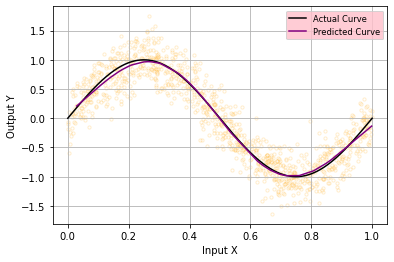

In [73]:
Kernal_Regression_by_GD(train_x,train_y,test_x,test_y,set_of_sigma_02,set_of_Lembda_02,0.000001,100000)

4. Modify the training set T by picking up randomly 20 data points from the training set T and scale their yi values by 25. Find the best fit using normal gradient descent and kernel gradient descent, considering RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian Kernel) and regularization parameter sigma. Also obtain the corresponding plot of best fit.

In [74]:
rand_index = np.random.randint(0,1000,20)
new_train_x = train_x[rand_index]
updated_train_y = train_y[rand_index]
new_train_y = updated_train_y*25

Lembda is 0.0078125
RMSE is 10.00001420229984
MAE is 9.088044871007076
R^2 is 0.004877064390337762


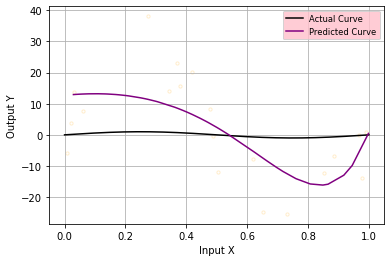

In [75]:
Polynomial_Regression_by_GD(new_train_x,new_train_y,test_x,test_y,8,tune_set,0.0001,100000)

Sigma is 0.25
Lembda is 0.0078125
RMSE is 17.78230202129989
MAE is 15.702645116025915
R^2 is 0.0015957544116640277


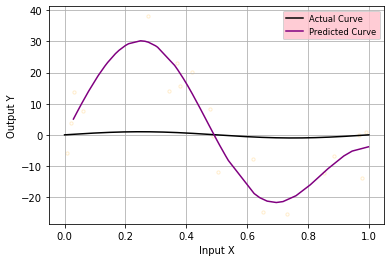

In [76]:
Kernal_Regression_by_GD(new_train_x,new_train_y,test_x,test_y,set_of_sigma,set_of_Lembda,0.01,100000)


5. Consider the motorcycle dataset. Find the best fit using Least Square kernel Regression using stochastic gradient descent, considering RBF (Gaussian Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian Kernel) and regularization parameter .Also obtain the corresponding plot of best fit.

In [88]:
def get_Weights_W_by_SGD_on_K(alpha,sigma,X,Y,Lembda,size_of_Subset,no_iteration=100000): # alpha is learning rate and SGD means stochastic gradient descent
    W = np.zeros(len(X)+1)
    for i in range(no_iteration):
        index_sub = np.random.randint(0,len(X),size_of_Subset)
        sub_X = X[index_sub]
        sub_Y = Y[index_sub]
        k = kernal_matrix(sub_X,X,sigma)
        W = W - alpha * gradient_for_RLF(sub_Y,k,W,Lembda)
    return W

In [89]:
data = pd.read_csv(r'C:\Users\BHARGAV PANDYA\Assignment\ML\motorcycle.csv')

In [90]:
data.head()

,x,y
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7


In [91]:
train_data = data.sample(frac=0.8,random_state=200)
test_data = data.drop(train_data.index)

In [92]:
train_data.shape

(106, 2)

In [93]:
test_data.shape

(27, 2)

In [94]:
train_data_x = np.array(train_data['x'])
train_data_y = np.array(train_data['y'])
test_data_x = np.array(test_data['x'])
test_data_y = np.array(test_data['y'])

In [96]:
train_k_SGD = kernal_matrix(train_data_x,train_data_x,0.25)

In [97]:
train_k_SGD.shape

(106, 107)

In [98]:
test_k_SGD = kernal_matrix(test_data_x,train_data_x,0.25)

In [99]:
W_k_SGD = get_Weights_W_by_SGD_on_K(0.001,0.25,train_data_x,train_data_y,0.0078125,20,10000)

In [100]:
train_predicted_y_k_SGD = get_predicted_Y(train_k_SGD,W_k_SGD)

RMSE is 16.424223299023353
MAE is 10.983355907120439
R^2 is 1.2092513551528012


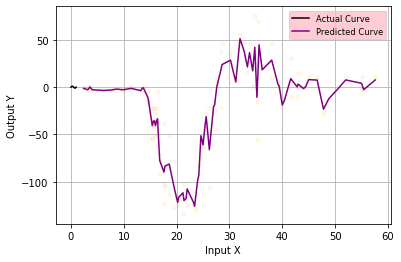

In [101]:
plot_graph(train_data_x,train_data_y,train_data_x,train_data_y,train_predicted_y_k_SGD)